# Librerías


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Datos

Dataset simulado con 8 observaciones o puntos sobre un plano

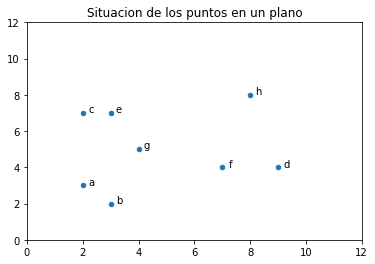

In [2]:
# Generar los datos y poner etiquetas a las observaciones
X=np.random.randint(2,10,(8,2)) # Simulación de un np.array de 8 x 2 
etiquetas=['a','b','c','d','e','f','g','h'] # Identificación observaciones

# Reflejar los puntos en un plano
def situacion(x,y,z):
    fig, ax = plt.subplots()
    ax.scatter(x, y,s=20)
    for i in range(8):       
      ax.text(x[i]+0.3,y[i]+0.2, z[i], color = 'black', ha = 'center', va = 'center')
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)
    ax.set_title('Situacion de los puntos en un plano')
    fig.show()


situacion(X[:,0],X[:,1],etiquetas)



## Cluster jerárquico

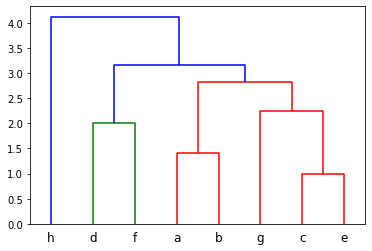

In [3]:
# Hacer el dendrograma de X

from scipy.cluster import hierarchy

W = hierarchy.linkage(X, 'single') # W contiene los clusters. Distancia euclidea y single linkage

fig, ax=plt.subplots()
ax = hierarchy.dendrogram(W,labels=etiquetas)
fig.show()


# Cluster Jerarquico a partir de la matriz de distancias

In [4]:
# Calcular distancias entre las observaciones

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

dist=pdist(X)  # Vector con las distancias entre las observaciones  

DIST=squareform(dist) # Matriz de las distancias entre las observaciones

df=pd.DataFrame(DIST,index=etiquetas,columns=etiquetas) # Matriz de distancias
pd.set_option('precision',2)
df

,a,b,c,d,e,f,g,h
a,0.00,1.41,4.00,7.07,4.12,5.10,2.83,7.81
b,1.41,0.00,5.10,6.32,5.00,4.47,3.16,7.81
c,4.00,5.10,0.00,7.62,1.00,5.83,2.83,6.08
d,7.07,6.32,7.62,0.00,6.71,2.00,5.10,4.12
e,4.12,5.00,1.00,6.71,0.00,5.00,2.24,5.10
f,5.10,4.47,5.83,2.00,5.00,0.00,3.16,4.12
g,2.83,3.16,2.83,5.10,2.24,3.16,0.00,5.00
h,7.81,7.81,6.08,4.12,5.10,4.12,5.00,0.00


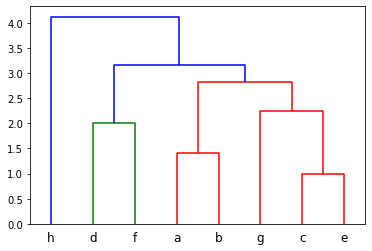

In [5]:
# Hacer el dendrograma a partir de la matriz de distancias

from scipy.cluster import hierarchy

W = hierarchy.linkage(dist, 'single') # W contiene los clusters

fig, ax=plt.subplots()
hierarchy.dendrogram(W,labels=etiquetas)
fig.show()


NameError: ignored

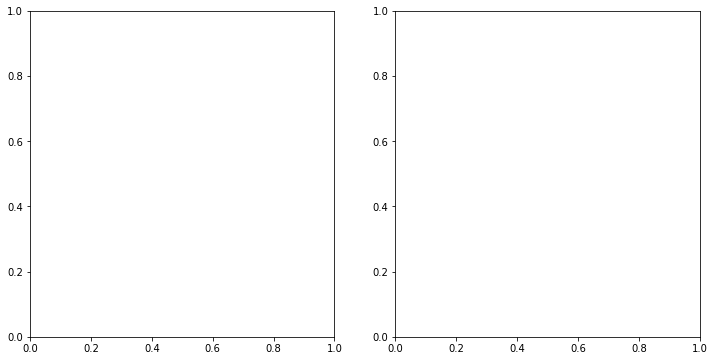

In [6]:
# representar conjuntamente el gráfico de las observaciones y el dendrograma

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12, 6))
ax1=a
ax2=hierarchy.dendrogram(W,labels=etiquetas)

